In [1]:
#Ignore the Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#Loading the data
train_df = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv')
test_df = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv')
#Re,oving the unwanted Column
train_df.drop(columns=['Unnamed: 0'], inplace=True)
test_df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
train_df.head()

,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [5]:
train_df.shape

(8000, 29)

In [6]:
test_df.head()

,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,2829.13,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,7268.22,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,7002.63,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,2176.80,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,7951.44,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [7]:
test_df.shape

(2845, 28)

Class distribution:
 class
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64


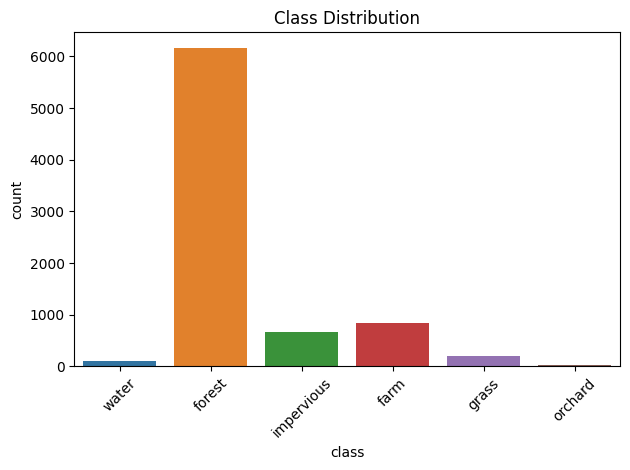

In [8]:
#Distribution of the label
print("Class distribution:\n", train_df['class'].value_counts())
sns.countplot(data=train_df, x='class')
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.tight_layout()
plt.show()

In [9]:
# Selecting the Independent columns
ndvi_columns = [col for col in train_df.columns if '_N' in col]

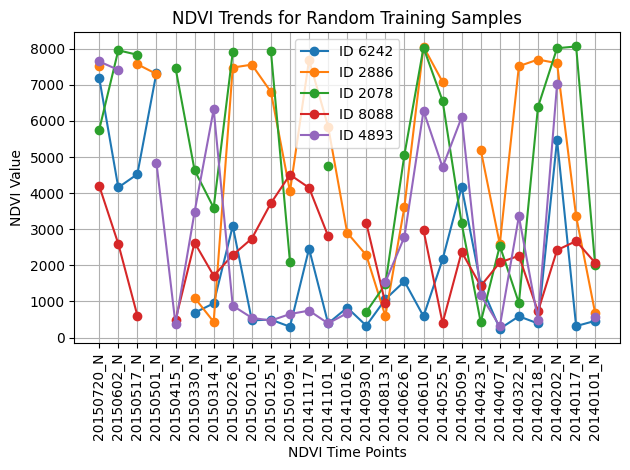

In [10]:
# Visualizing NDVI over 5 random samples in each column of the training data 
import random   #module to select the random samples
sample_indices = random.sample(range(len(train_df)), 5)    #selects 5 random samples from the each column
for idx in sample_indices: #iterates over the random samples of column 
    plt.plot(ndvi_columns, train_df.loc[idx, ndvi_columns], marker='o', label=f'ID {train_df.loc[idx, "ID"]}')
plt.xticks(rotation=90) #rotates the x-axis lines names (column name by 90 degree for better visualization)
plt.xlabel("NDVI Time Points")  #x-axis name 
plt.ylabel("NDVI Value")    #y-axis name 
plt.title("NDVI Trends for Random Training Samples")   #plot for the plot 
plt.legend() #displays the legend   
plt.grid(True)   #displays the plot in grid format
plt.tight_layout()   #adjusts the plot to the correct display
plt.show()   #displays the plot 

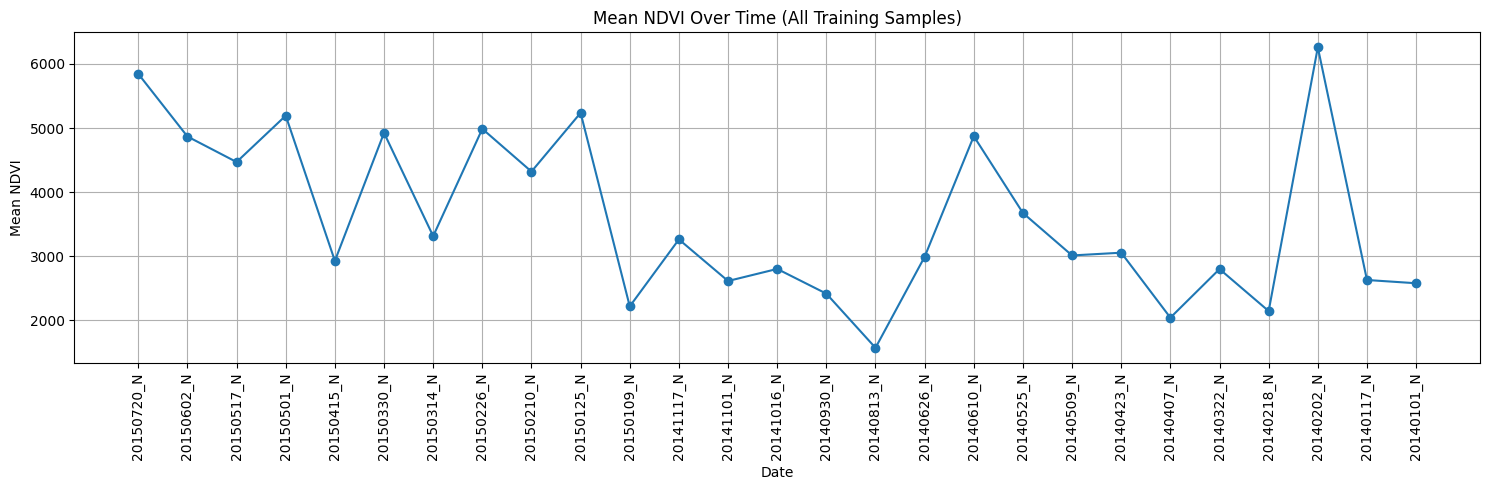

In [11]:
# Visualize that how the Mean NDVI Value Changes over time
ndvi_means = train_df[ndvi_columns].mean()   # compute the mean
plt.figure(figsize=(15, 5))   #creates a new figure with width 15 and height 5
ndvi_means.plot(marker='o')    #plot the mean point in the shape of 'o'
plt.xticks(ticks=range(len(ndvi_means)), labels=ndvi_means.index, rotation=90)   #x labels(column names) rotate by 90 degree for better visibility 
plt.title("Mean NDVI Over Time (All Training Samples)")     #title for the plot 
plt.xlabel("Date")      #name for the X-axis 
plt.ylabel("Mean NDVI")    #name for the y-axis
plt.grid(True)   #displays the plot in grid format
plt.tight_layout()    #plot layout adjustment 
plt.show()   #displays the plot 

In [12]:
#Missing value treatment
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
train_df[ndvi_columns] = imputer.fit_transform(train_df[ndvi_columns])
test_df[ndvi_columns] = imputer.transform(test_df[ndvi_columns])

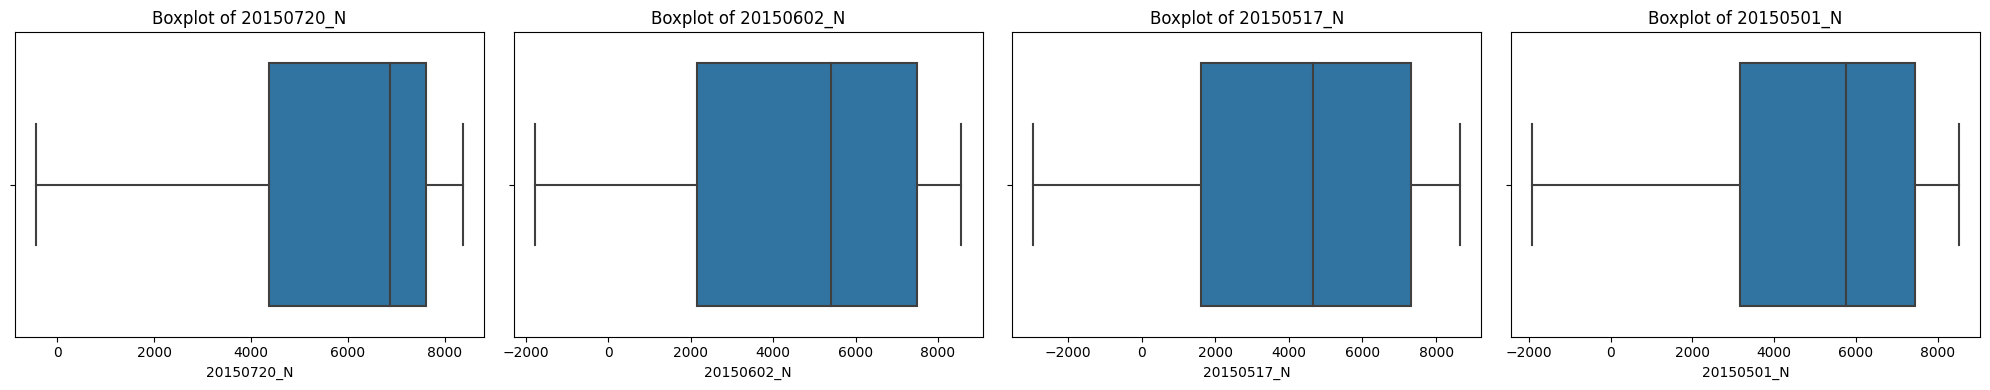

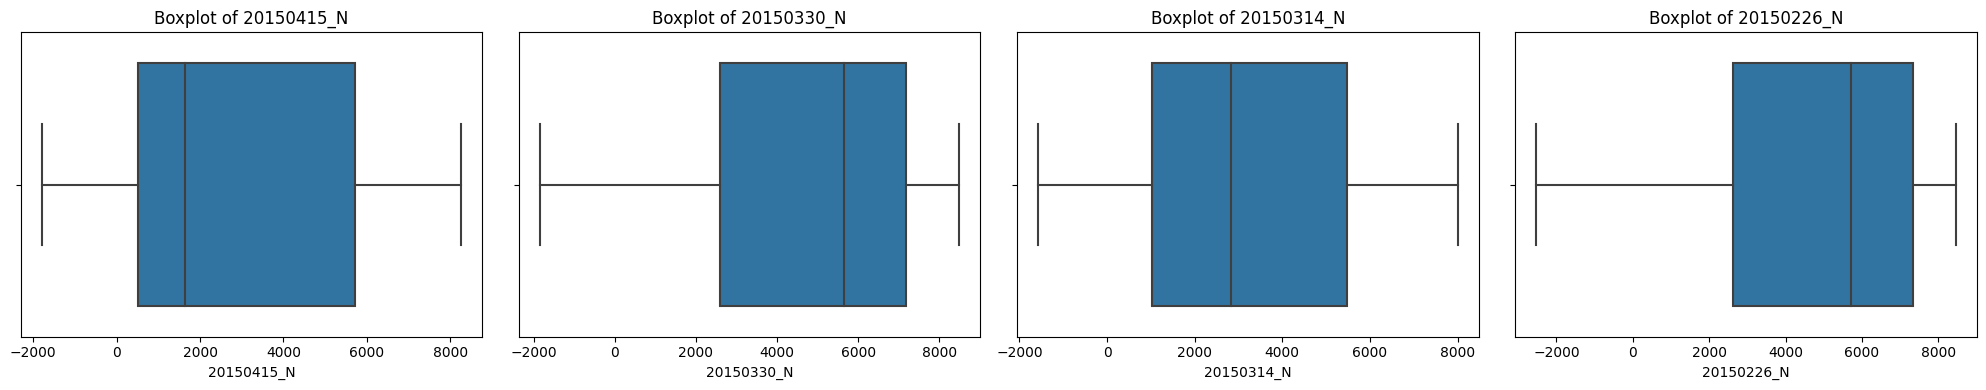

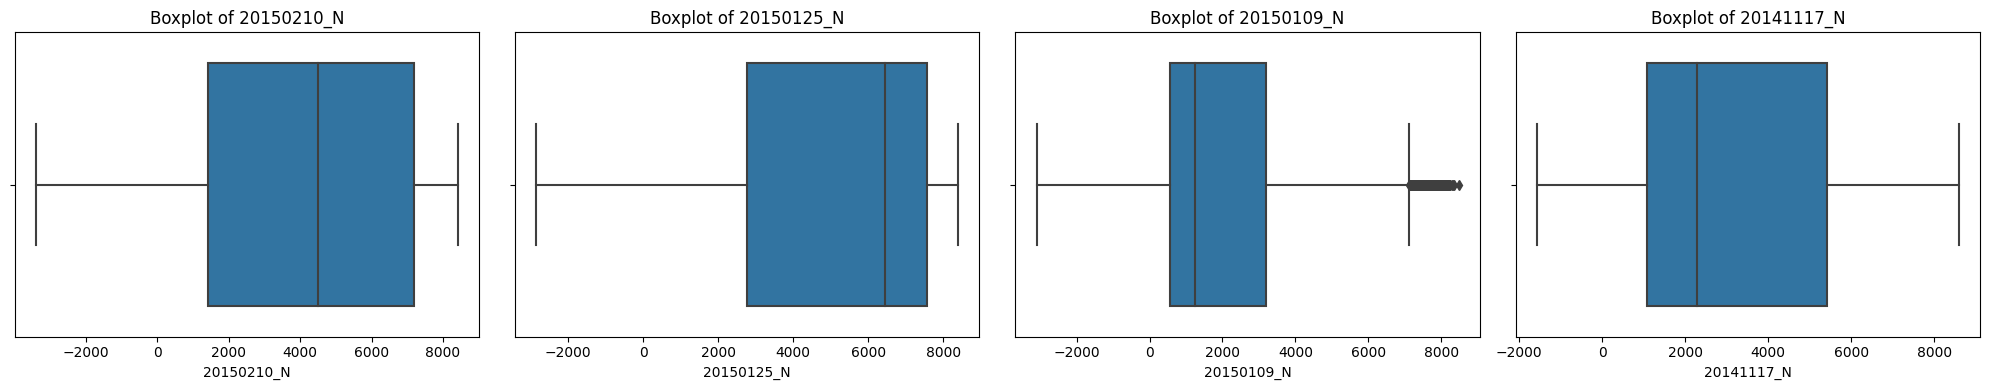

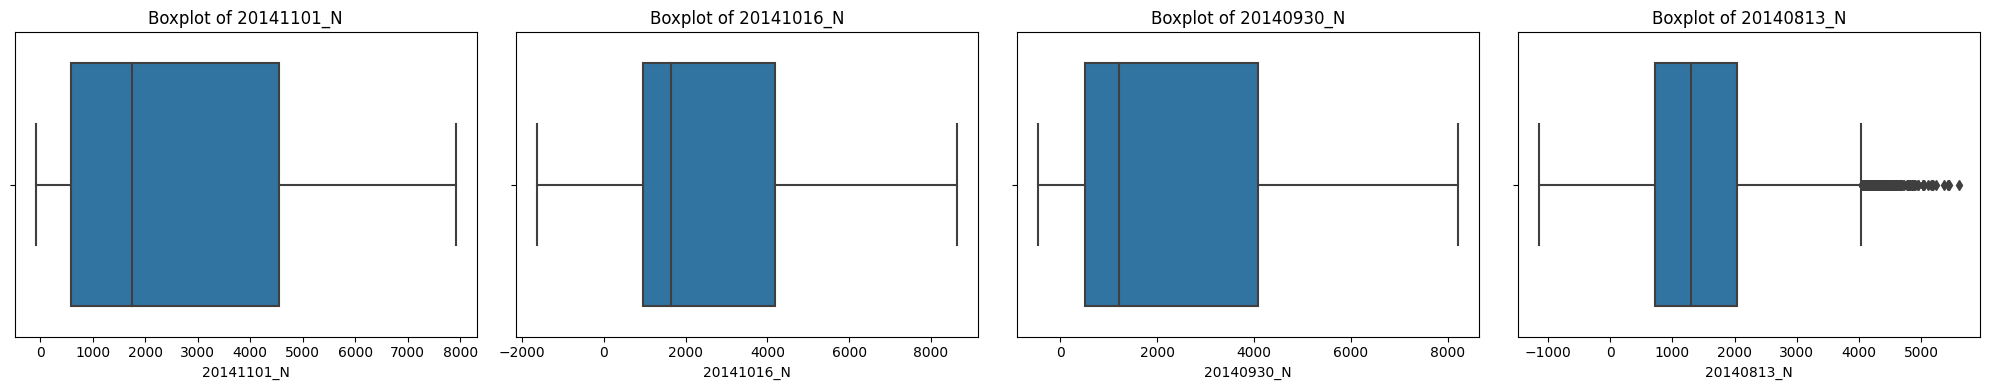

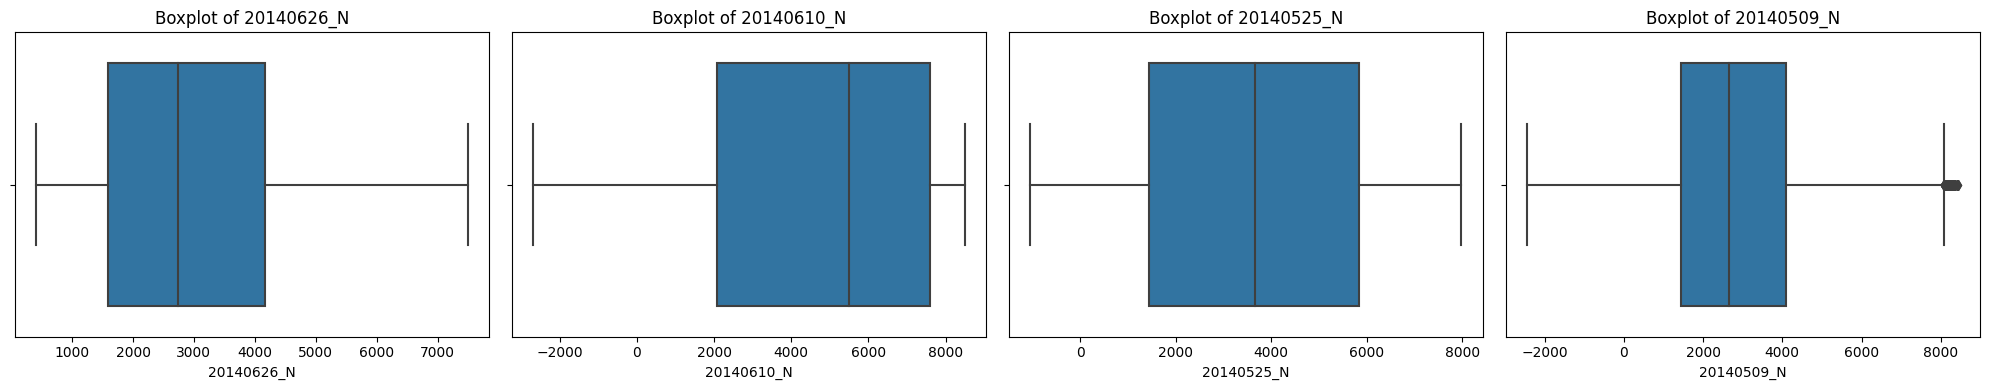

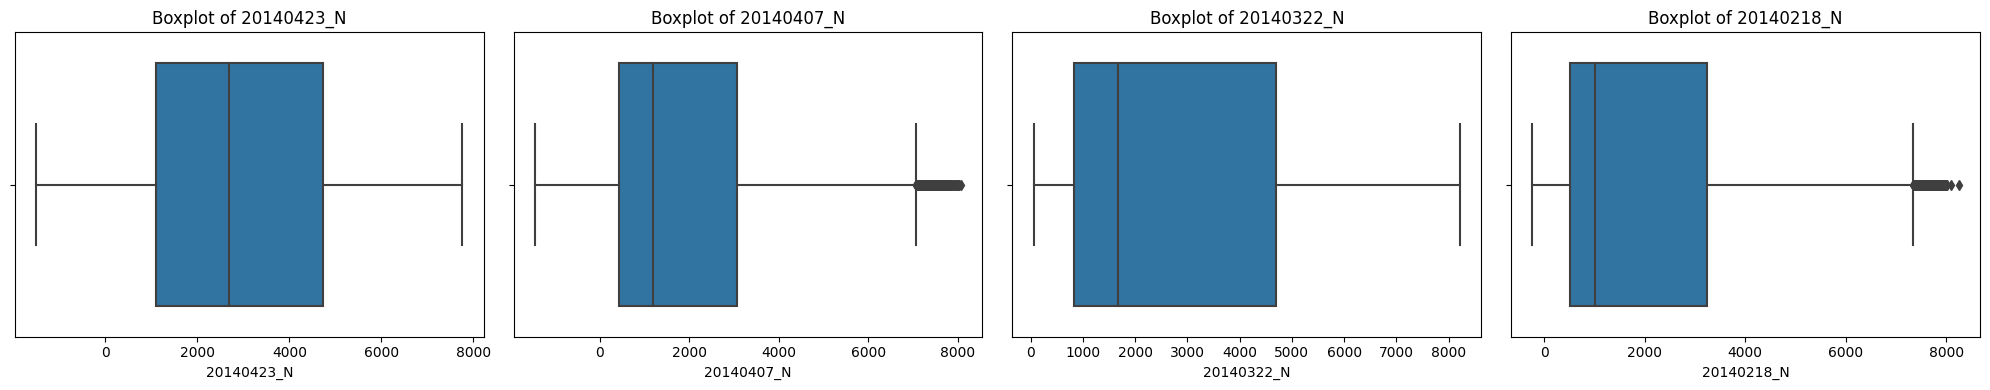

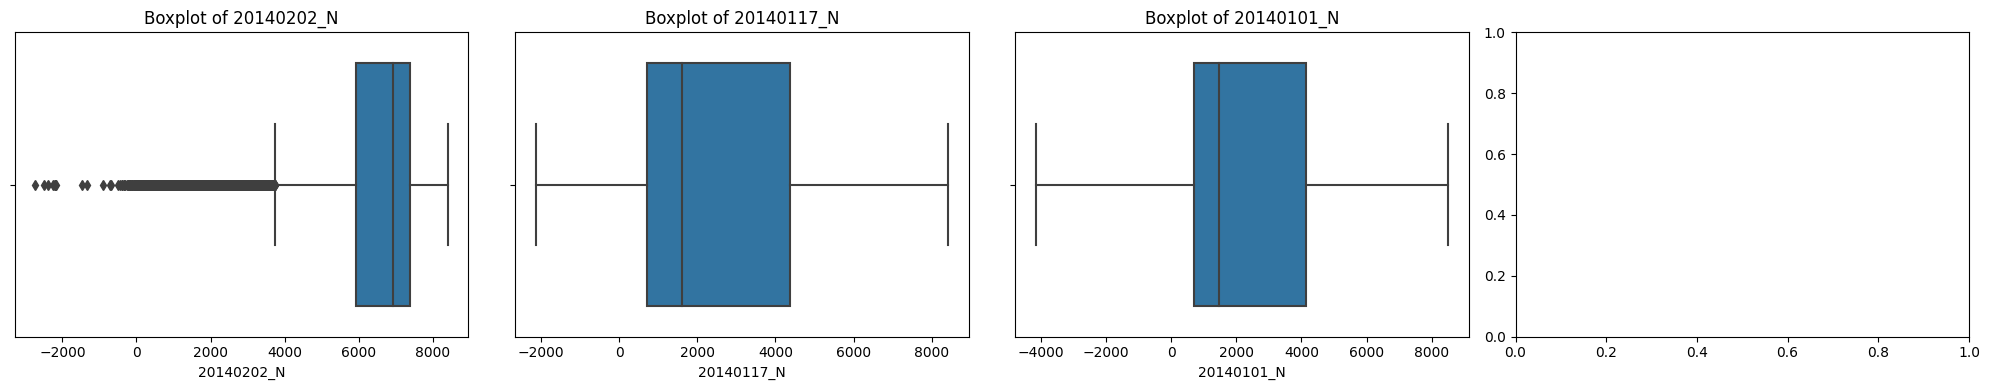

In [13]:
#Visualize the Distribution of NDVI values for outlier identification
for i in range(0, len(ndvi_columns), 4):     #iterates over the ndvi_columns 
    subset = ndvi_columns[i:i+4]         #subset grabes 4 ndvi cols at a time 
    fig, axes = plt.subplots(1, 4, figsize=(20, 4)) #creates a row of 4 subplots horizontally
    for ax, col in zip(axes, subset):      #iterates over each axes and the column pair
        sns.boxplot(x=train_df[col], ax=ax)     #creates a boxplot for each column 
        ax.set_title(f"Boxplot of {col}")    #sets the title for the plot
        ax.set_xlabel(col)     #sets the col name as the x-axis name for the plot
    plt.tight_layout()        #prevents overlapping 
    plt.show()      #displays the 4 box plots in each iteration 

In [14]:
#feature engineering to extract the meaningful stats and trends from the data(per sample)
def feature_engineering(df):    #defining of the function 
    df['ndvi_mean'] = df[ndvi_columns].mean(axis=1)  #mean 
    df['ndvi_std'] = df[ndvi_columns].std(axis=1)    #standard deviation
    df['ndvi_min'] = df[ndvi_columns].min(axis=1)    #minimum
    df['ndvi_max'] = df[ndvi_columns].max(axis=1)   #maximum
    df['ndvi_median'] = df[ndvi_columns].median(axis=1)   #median
    df['ndvi_range'] = df['ndvi_max'] - df['ndvi_min']    #range
    df['ndvi_slope'] = df[ndvi_columns].apply(lambda x: np.polyfit(range(len(x)), x, 1)[0], axis=1)    #slope
    df['ndvi_peak_idx'] = df[ndvi_columns].idxmax(axis=1).str.extract(r'(\d{8})').astype(float)    #finds the highest value in an column per sample
    df['ndvi_missing'] = df[ndvi_columns].isna().sum(axis=1)    #counts the missing values in each sample     
    df['ndvi_q1'] = df[ndvi_columns].quantile(0.25, axis=1)    #25% quatile 
    df['ndvi_q3'] = df[ndvi_columns].quantile(0.75, axis=1)   #75% quatile 
    df['ndvi_IQR'] = df['ndvi_q3']-df['ndvi_q1']   #calculates the IQR(Inter quartile range)
    return df

train_df = feature_engineering(train_df)    #calling the function for training data 
test_df = feature_engineering(test_df)       #calling the function for the test data 

In [15]:
#Label Encoding(converting the categorical class values into numerical values)
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['class'])

In [16]:
#Final feature list
feature_cols = ndvi_columns + [
    'ndvi_mean', 'ndvi_std', 'ndvi_min', 'ndvi_max', 'ndvi_median',
    'ndvi_range', 'ndvi_slope', 'ndvi_peak_idx', 'ndvi_missing',
    'ndvi_q1', 'ndvi_q3','ndvi_IQR']

In [17]:
#Scaling(Performs Scaling makes the scaling uniform across all the features)
scaler = StandardScaler()

X = scaler.fit_transform(train_df[feature_cols])    #Fits the Scaler and the transform the training data 
X_test_scaled = scaler.transform(test_df[feature_cols])   #only transform the testing data 
y = train_df['label']

In [18]:
#Splitting the data into training data and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
#Libraries for the model and the metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
#Fitting the model
model = LogisticRegression(max_iter=2000, class_weight='balanced', multi_class='multinomial')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000,
                   multi_class='multinomial')


Validation Accuracy: 82.88 %

Classification Report:
               precision    recall  f1-score   support

        farm       0.59      0.74      0.65       168
      forest       0.98      0.84      0.91      1232
       grass       0.33      0.67      0.44        39
  impervious       0.84      0.87      0.85       134
     orchard       0.06      0.67      0.11         6
       water       0.36      0.76      0.49        21

    accuracy                           0.83      1600
   macro avg       0.53      0.76      0.58      1600
weighted avg       0.90      0.83      0.86      1600



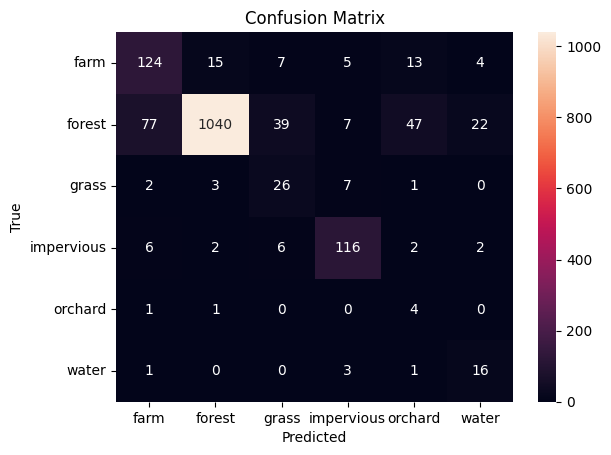

In [21]:
#predicting for the testing data(Validation)
y_pred = model.predict(X_test)   
#Calculating the accuracy 
val_acc = accuracy_score(y_test,y_pred)
print("\nValidation Accuracy:", round(val_acc * 100, 2), "%")
#Calculating the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
#Display the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [22]:
#Predicting for the actual test data 
test_preds = model.predict(X_test_scaled)
test_df['class'] = label_encoder.inverse_transform(test_preds)
submission = test_df[['ID', 'class']]

Class distribution:
 class
forest        1251
farm           629
impervious     358
grass          301
water          163
orchard        143
Name: count, dtype: int64


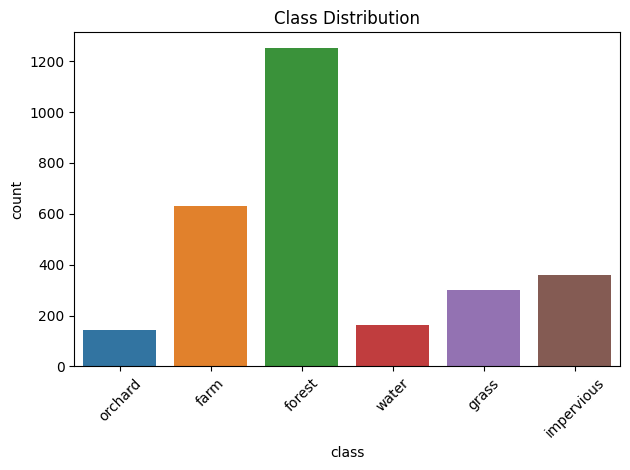

In [23]:
#Distribution of the classes
print("Class distribution:\n", test_df['class'].value_counts())
sns.countplot(data=submission, x='class')
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.tight_layout()
plt.show()

In [24]:
#converting the results into .csv format
submission.to_csv("submission.csv", index=False)
print("\nSubmission file created: submission.csv")


Submission file created: submission.csv
